In [307]:
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [308]:
king = pd.read_csv('kc_house_data.csv')
king.sample(20)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7640,2623069031,5/21/2014,542500.0,5,3.25,3010,1074218,1.5,NaN,0.0,...,8,2010,1000.0,1931,0.0,98027,47.4564,-122.004,2450,68825
15763,8682290660,11/26/2014,699950.0,2,2.50,2390,7489,1.0,0.0,0.0,...,8,2390,0.0,2007,0.0,98053,47.7243,-122.032,2170,7489
7378,5039300305,11/7/2014,450000.0,3,2.50,1990,3478,2.0,0.0,0.0,...,10,1520,470.0,1990,NaN,98199,47.6361,-122.399,1710,6157
16739,7796450190,2/2/2015,277500.0,3,2.50,1690,5171,2.0,0.0,0.0,...,8,1690,0.0,2003,0.0,98023,47.2779,-122.347,2550,5025
19667,1624049293,5/6/2014,390000.0,5,3.75,2890,5000,1.0,0.0,0.0,...,7,1310,1580.0,2006,NaN,98108,47.5701,-122.296,1930,5117
21164,3862700020,4/23/2015,433190.0,3,2.50,1650,2787,2.0,0.0,0.0,...,8,1650,0.0,2014,0.0,98065,47.5336,-121.838,1760,2787
3627,6116500300,9/10/2014,525000.0,3,1.75,2870,26500,1.5,0.0,1.0,...,8,2870,0.0,1948,1981.0,98166,47.4485,-122.355,2420,20500
20651,726059485,11/17/2014,496000.0,3,2.50,2180,4533,2.0,0.0,0.0,...,7,2180,0.0,2010,NaN,98011,47.7540,-122.215,2180,7347
20726,2902200241,6/23/2014,562500.0,3,2.25,1300,907,2.0,0.0,0.0,...,8,1000,300.0,2006,NaN,98102,47.6371,-122.327,1300,1169
16557,6908200250,3/12/2015,680000.0,4,1.00,1660,6075,1.5,0.0,0.0,...,7,1660,0.0,1915,NaN,98117,47.6755,-122.403,1810,5400


In [309]:
king.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [311]:
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [312]:
king.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [313]:
king = king[['price','bedrooms','bathrooms','sqft_living','grade']]


In [314]:
king['occupancy_per_sqft'] = round(king['sqft_living']/king['bedrooms'])

/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [315]:
king['quality_per_person'] = king['occupancy_per_sqft']*king['grade']

/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [316]:
king['space_x_grade'] = king['grade']*king['sqft_living']

/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [319]:
king.head()

,price,bedrooms,bathrooms,sqft_living,grade,occupancy_per_sqft,quality_per_person,space_x_grade
0,221900.0,3,1.00,1180,7,393.0,2751.0,8260
1,538000.0,3,2.25,2570,7,857.0,5999.0,17990
2,180000.0,2,1.00,770,6,385.0,2310.0,4620
3,604000.0,4,3.00,1960,7,490.0,3430.0,13720
4,510000.0,3,2.00,1680,8,560.0,4480.0,13440


In [320]:
mid = king[king.grade == 4]
mid_model = ols('price~space_x_grade+quality_per_person', data = king).fit()
mid_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                 1.461e+04
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:35:55   Log-Likelihood:            -2.9815e+05
No. Observations:               21597   AIC:                         5.963e+05
Df Residuals:                   21594   BIC:                         5.963e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.956e+04   3708.925     16.060      0.000    5.23e+04    6.68e+04
space_x_grade         23.5497      0.330     71.458      0.000      22.904      24.196
quality_per_person    17.6108      1.393     12.640      0.000      14.880      20.342
==============================================================================
Omnibus:                    13278.937   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388672.128
Skew:                           2.467   Prob(JB):                         0.00
Kurtosis:                      23.189   Cond. No.                     4.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [321]:
king_model = ols('price~space_x_grade+quality_per_person', data = king).fit()
king_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                 1.461e+04
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:35:56   Log-Likelihood:            -2.9815e+05
No. Observations:               21597   AIC:                         5.963e+05
Df Residuals:                   21594   BIC:                         5.963e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.956e+04   3708.925     16.060      0.000    5.23e+04    6.68e+04
space_x_grade         23.5497      0.330     71.458      0.000      22.904      24.196
quality_per_person    17.6108      1.393     12.640      0.000      14.880      20.342
==============================================================================
Omnibus:                    13278.937   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388672.128
Skew:                           2.467   Prob(JB):                         0.00
Kurtosis:                      23.189   Cond. No.                     4.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [322]:
king.head()

,price,bedrooms,bathrooms,sqft_living,grade,occupancy_per_sqft,quality_per_person,space_x_grade
0,221900.0,3,1.00,1180,7,393.0,2751.0,8260
1,538000.0,3,2.25,2570,7,857.0,5999.0,17990
2,180000.0,2,1.00,770,6,385.0,2310.0,4620
3,604000.0,4,3.00,1960,7,490.0,3430.0,13720
4,510000.0,3,2.00,1680,8,560.0,4480.0,13440


In [326]:

pd.get_dummies(king.grade).iloc[:,1:]

,4,5,6,7,8,9,10,11,12,13
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,1,0,0,0,0,0
21593,0,0,0,0,1,0,0,0,0,0
21594,0,0,0,1,0,0,0,0,0,0
21595,0,0,0,0,1,0,0,0,0,0


In [327]:
king.corr()

,price,bedrooms,bathrooms,sqft_living,grade,occupancy_per_sqft,quality_per_person,space_x_grade
price,1.000000,0.308787,0.525906,0.701917,0.667951,0.580101,0.688890,0.756248
bedrooms,0.308787,1.000000,0.514508,0.578212,0.356563,-0.024082,0.106507,0.506704
bathrooms,0.525906,0.514508,1.000000,0.755758,0.665838,0.517406,0.601308,0.738928
sqft_living,0.701917,0.578212,0.755758,1.000000,0.762779,0.755393,0.829214,0.973752
grade,0.667951,0.356563,0.665838,0.762779,1.000000,0.639412,0.812581,0.848301
occupancy_per_sqft,0.580101,-0.024082,0.517406,0.755393,0.639412,1.000000,0.953775,0.756611
quality_per_person,0.688890,0.106507,0.601308,0.829214,0.812581,0.953775,1.000000,0.875040
space_x_grade,0.756248,0.506704,0.738928,0.973752,0.848301,0.756611,0.875040,1.000000


In [ ]:
king.loc[]

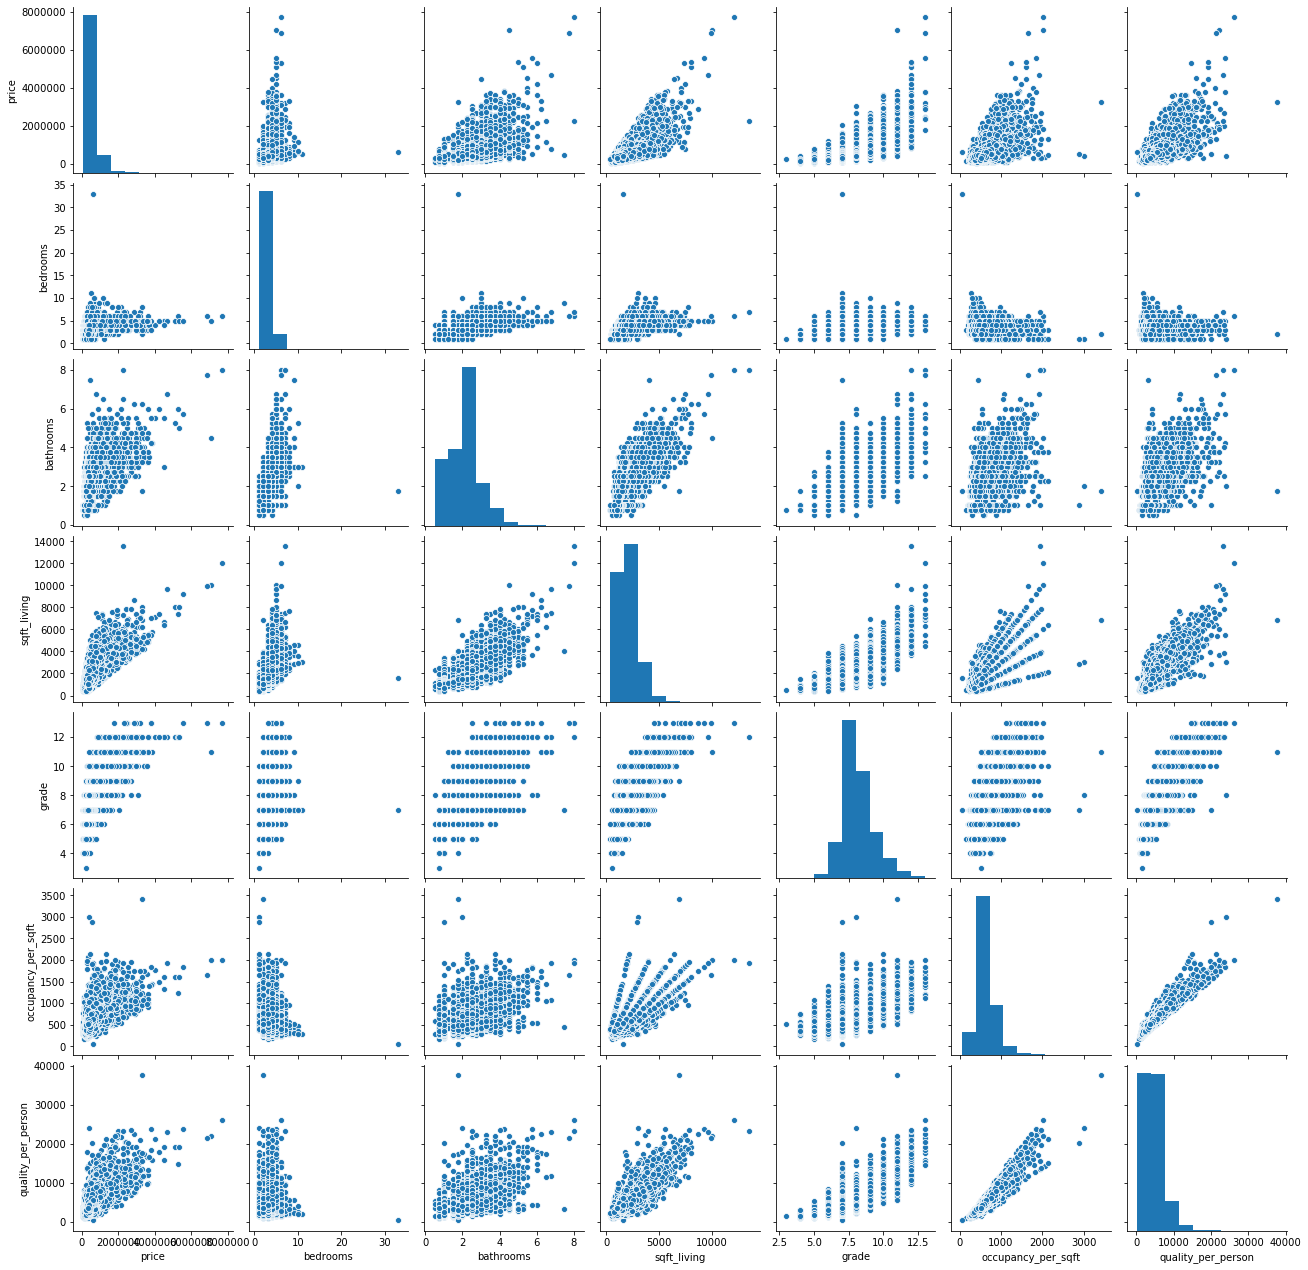

In [205]:
import seaborn as sns
sns.pairplot(king)


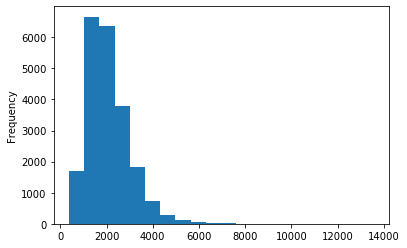

In [103]:
king_quality.loc[king_quality.sqft_living < 100000, 'sqft_living'].plot(kind='hist', bins = 20)

In [178]:
king['x_factor'] = np.log(king['x_factor'])

In [216]:
king_model = ols('price~bedrooms+bathrooms+sqft_living', data = king).fit()
king_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:04:02   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.639e+04   6956.321     10.981      0.000    6.28e+04       9e+04
bedrooms    -5.857e+04   2347.628    -24.950      0.000   -6.32e+04    -5.4e+04
bathrooms    7659.0953   3523.302      2.174      0.030     753.163    1.46e+04
sqft_living   310.1848      3.101    100.011      0.000     304.106     316.264
==============================================================================
Omnibus:                    14417.262   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490912.091
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      25.707   Cond. No.                     9.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [217]:
king_model = ols('price~grade+sqft_living', data = king).fit()
king_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:05:13   Log-Likelihood:            -2.9913e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21594   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.028e+05   1.33e+04    -45.181      0.000   -6.29e+05   -5.77e+05
grade        9.925e+04   2247.784     44.155      0.000    9.48e+04    1.04e+05
sqft_living   184.1215      2.872     64.102      0.000     178.491     189.751
==============================================================================
Omnibus:                    16960.955   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005795.090
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.773   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [281]:
g = king[king["grade"] == 7]
g.head()
king_model = ols('price~space_x_grade', data = g).fit()
king_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1032.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):          1.80e-214
Time:                        07:00:14   Log-Likelihood:            -1.1954e+05
No. Observations:                8974   AIC:                         2.391e+05
Df Residuals:                    8972   BIC:                         2.391e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.369e+05   5388.283     43.959      0.000    2.26e+05    2.47e+05
space_x_grade    14.0136      0.436     32.128      0.000      13.159      14.869
==============================================================================
Omnibus:                     2015.378   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5806.668
Skew:                           1.175   Prob(JB):                         0.00
Kurtosis:                       6.164   Cond. No.                     4.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
king_model = ols('price~space_x_grade', data = king).fit()
king_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                 2.885e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:49:43   Log-Likelihood:            -2.9823e+05
No. Observations:               21597   AIC:                         5.965e+05
Df Residuals:                   21595   BIC:                         5.965e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.471e+04   3141.583     26.965      0.000    7.86e+04    9.09e+04
space_x_grade    27.1949      0.160    169.853      0.000      26.881      27.509
==============================================================================
Omnibus:                    12978.992   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           356626.542
Skew:                           2.406   Prob(JB):                         0.00
Kurtosis:                      22.317   Cond. No.                     3.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
king_model = ols('price~space_x_grade+bedrooms+bathrooms', data = king).fit()
king_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     9948.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:06:52   Log-Likelihood:            -2.9802e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21593   BIC:                         5.961e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.045e+05   6620.226     30.885      0.000    1.91e+05    2.17e+05
space_x_grade    30.0409      0.241    124.558      0.000      29.568      30.514
bedrooms       -3.64e+04   2090.078    -17.417      0.000   -4.05e+04   -3.23e+04
bathrooms      -2.11e+04   3221.387     -6.549      0.000   -2.74e+04   -1.48e+04
==============================================================================
Omnibus:                    12492.418   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320427.774
Skew:                           2.299   Prob(JB):                         0.00
Kurtosis:                      21.301   Cond. No.                     8.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
king_model = ols('price~quality_per_person', data = king).fit()
king_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                 1.950e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:57:31   Log-Likelihood:            -3.0044e+05
No. Observations:               21597   AIC:                         6.009e+05
Df Residuals:                   21595   BIC:                         6.009e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.759e+04   4093.982      6.740      0.000    1.96e+04    3.56e+04
quality_per_person   104.7261      0.750    139.659      0.000     103.256     106.196
==============================================================================
Omnibus:                    15950.121   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           817322.590
Skew:                           3.043   Prob(JB):                         0.00
Kurtosis:                      32.517   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
quality_price = plt.scatter(x=king["condition"],
                        y=king["price"],
                          alpha=0.5)

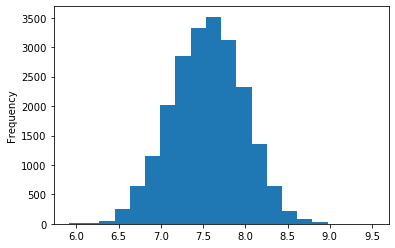

In [106]:
#plt.hist(king_quality.sqft_living)
import numpy as np
king_quality['sqft_living'] = np.log(king_quality['sqft_living'])
king_quality.loc[king_quality.sqft_living < 100000, 'sqft_living'].plot(kind='hist', bins = 20)



In [107]:


king_model = ols('price~sqft_living', data = king).fit()

In [108]:
king_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:58:54   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
king_quality

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,zipcode
0,221900.0,3,1.00,7.073270,5650,3,7,1180,0.0,98178
1,538000.0,3,2.25,7.851661,7242,3,7,2170,400.0,98125
2,180000.0,2,1.00,6.646391,10000,3,6,770,0.0,98028
3,604000.0,4,3.00,7.580700,5000,5,7,1050,910.0,98136
4,510000.0,3,2.00,7.426549,8080,3,8,1680,0.0,98074
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,7.333023,1131,3,8,1530,0.0,98103
21593,400000.0,4,2.50,7.745003,5813,3,8,2310,0.0,98146
21594,402101.0,2,0.75,6.927558,1350,3,7,1020,0.0,98144
21595,400000.0,3,2.50,7.377759,2388,3,8,1600,0.0,98027


,price,bedrooms,bathrooms,sqft_living,grade,occupancy_per_sqft,quality_per_person,space_x_grade
36,550000.0,4,1.00,1660,5,415.0,2075.0,8300
166,269950.0,2,1.75,1340,5,670.0,3350.0,6700
263,425000.0,2,1.00,770,5,385.0,1925.0,3850
264,369900.0,1,0.75,760,5,760.0,3800.0,3800
411,517534.0,2,1.00,833,5,416.0,2080.0,4165
...,...,...,...,...,...,...,...,...
21567,399950.0,2,1.00,710,7,355.0,2485.0,4970
21568,380000.0,3,2.50,1260,7,420.0,2940.0,8820
21569,270000.0,3,2.50,1870,7,623.0,4361.0,13090
21594,402101.0,2,0.75,1020,7,510.0,3570.0,7140


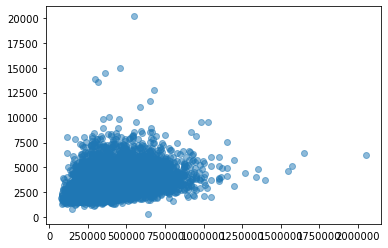

In [294]:
import matplotlib.pyplot as plt
g = king[king["grade"] == 5]
p = king[king["grade"] == 6]
q= king[king["grade"] == 7]
frames = [g, p, q]
five_six_seven = pd.concat(frames, axis = 0)
quality_price = plt.scatter(x=five_six_seven.price,
                        y=five_six_seven.quality_per_person,
                          alpha=0.5)
five_six_seven

In [295]:
g.head()

,price,bedrooms,bathrooms,sqft_living,grade,occupancy_per_sqft,quality_per_person,space_x_grade
36,550000.0,4,1.00,1660,5,415.0,2075.0,8300
166,269950.0,2,1.75,1340,5,670.0,3350.0,6700
263,425000.0,2,1.00,770,5,385.0,1925.0,3850
264,369900.0,1,0.75,760,5,760.0,3800.0,3800
411,517534.0,2,1.00,833,5,416.0,2080.0,4165


In [ ]:

five_six_seven.loc[five_six_seven.space_x_grade].plot(kind = 'hist', bins = 20)

In [ ]:
plt.hist(five_six_seven, 20, facecolor='blue', alpha=0.5)

In [329]:
five_six_seven.isnull().sum()

price                 0
bedrooms              0
bathrooms             0
sqft_living           0
grade                 0
occupancy_per_sqft    0
quality_per_person    0
space_x_grade         0
dtype: int64

In [304]:
king_model = ols('price~space_x_grade+bedrooms+bathrooms', data = king).fit()
king_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     9948.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:24:30   Log-Likelihood:            -2.9802e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21593   BIC:                         5.961e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.045e+05   6620.226     30.885      0.000    1.91e+05    2.17e+05
space_x_grade    30.0409      0.241    124.558      0.000      29.568      30.514
bedrooms       -3.64e+04   2090.078    -17.417      0.000   -4.05e+04   -3.23e+04
bathrooms      -2.11e+04   3221.387     -6.549      0.000   -2.74e+04   -1.48e+04
==============================================================================
Omnibus:                    12492.418   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320427.774
Skew:                           2.299   Prob(JB):                         0.00
Kurtosis:                      21.301   Cond. No.                     8.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""